In [1]:
!pip install fal-client

In [2]:
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# https://fal.ai/dashboard/keys
# put your key in the .env file with the name FAL_KEY

True

Generating 1 images...
 17%|█▋        | 4/24 [00:00<00:03,  5.19it/s]
Generating 1 images...
 17%|█▋        | 4/24 [00:00<00:03,  5.19it/s]
Generating 1 images...
 17%|█▋        | 4/24 [00:00<00:03,  5.19it/s]
Generating 1 images...
 17%|█▋        | 4/24 [00:00<00:03,  5.19it/s]
Generating 1 images...
 42%|████▏     | 10/24 [00:01<00:02,  5.34it/s]
Generating 1 images...
 42%|████▏     | 10/24 [00:01<00:02,  5.34it/s]
Generating 1 images...
 42%|████▏     | 10/24 [00:01<00:02,  5.34it/s]
Generating 1 images...
 67%|██████▋   | 16/24 [00:03<00:01,  5.36it/s]
Generating 1 images...
 67%|██████▋   | 16/24 [00:03<00:01,  5.36it/s]
Generating 1 images...
 67%|██████▋   | 16/24 [00:03<00:01,  5.36it/s]
Generating 1 images...
 96%|█████████▌| 23/24 [00:04<00:00,  5.35it/s]
Generating 1 images...
 96%|█████████▌| 23/24 [00:04<00:00,  5.35it/s]
Generating 1 images...
100%|██████████| 24/24 [00:04<00:00,  5.37it/s]
NSFW probability: 0.0001237415854120627
Uploading images...
Generating 1 images..

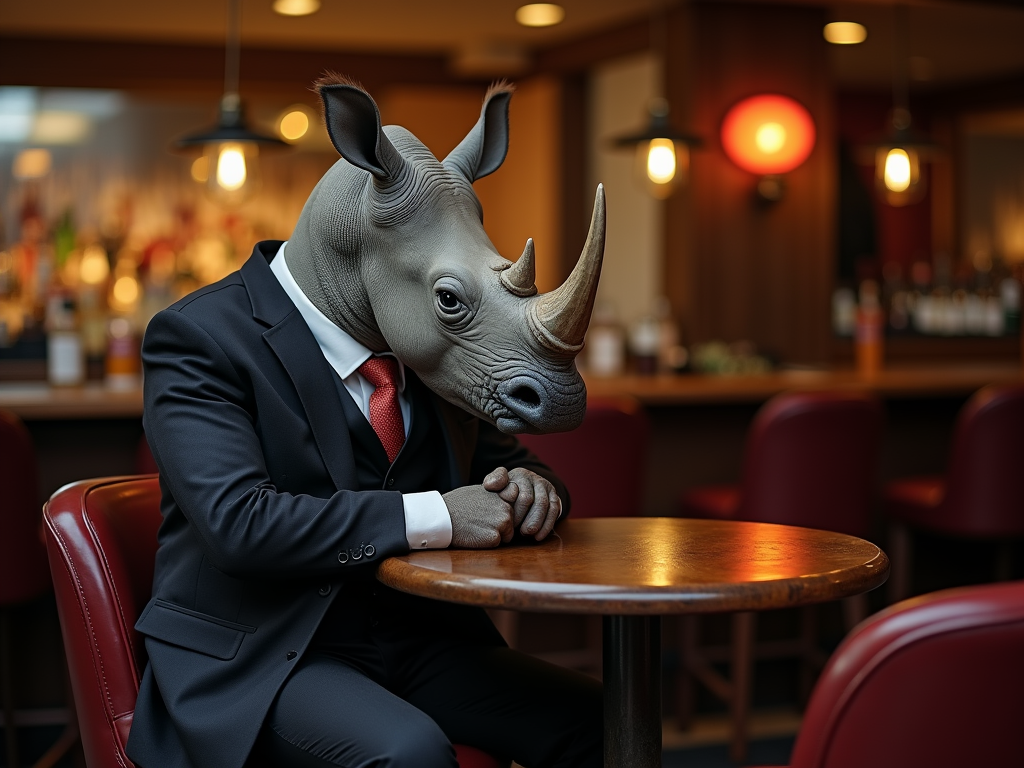


Added Mask


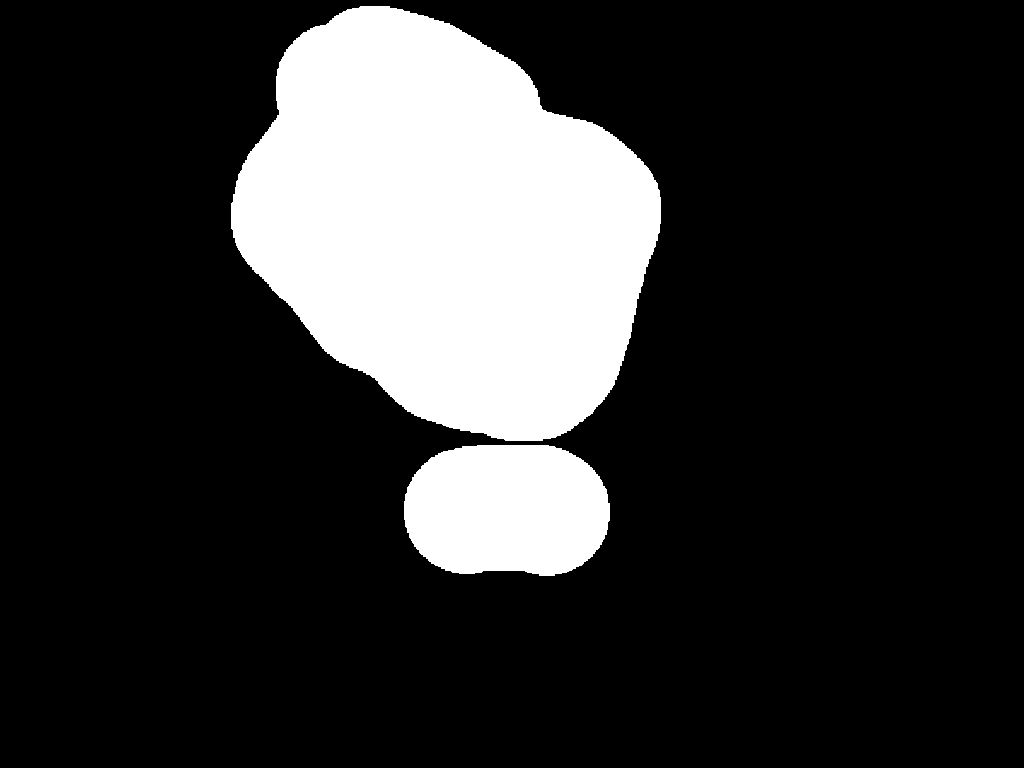


After transformation:


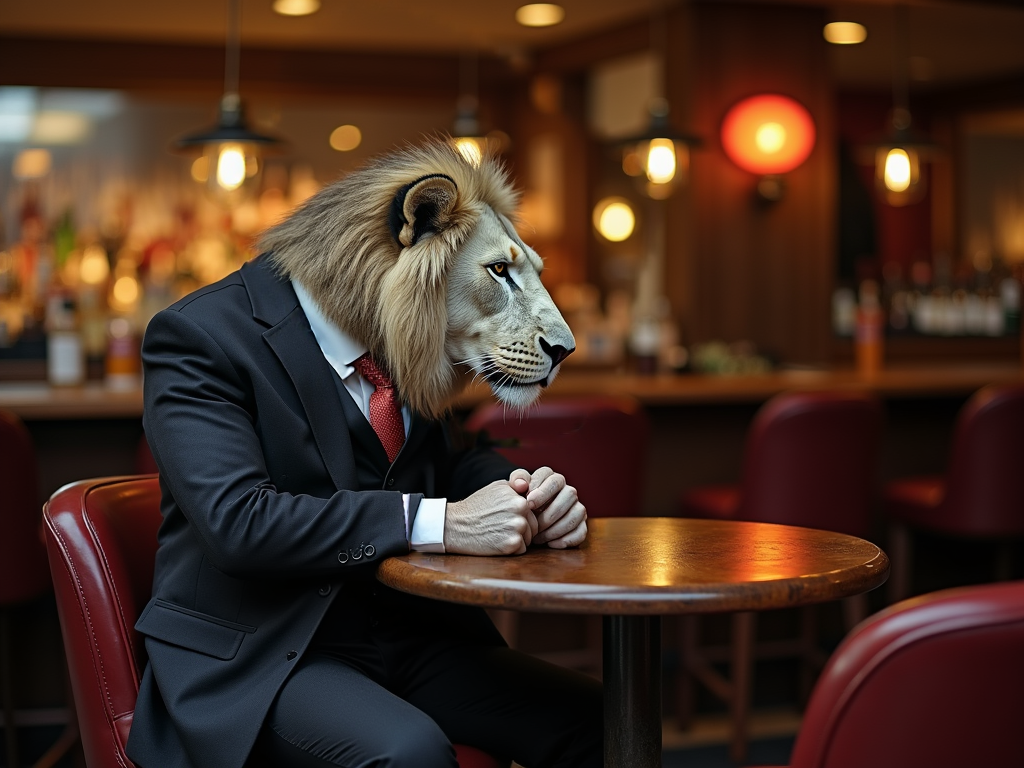

In [2]:
import fal_client
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display

def on_queue_update(update):
    if isinstance(update, fal_client.InProgress):
        for log in update.logs:
           print(log["message"])

image_url = fal_client.upload_file("rhino-suit.png")

# https://fal.ai/models/fal-ai/flux-general/inpainting/playground

mask_url = fal_client.upload_file("rhino-mask.png")

prompt = "a photo of a lion in a suit"

result = fal_client.subscribe(
    "fal-ai/flux-general/inpainting",
    arguments={
        "image_url": image_url,
        "mask_url": mask_url,
        "prompt": prompt
    },
    with_logs=True,
    on_queue_update=on_queue_update,
)
print(result)

# Load original image
print("\nBefore transformation:")
original_img = Image.open("rhino-suit.png")
display(original_img)
print("\nAdded Mask")
mask_img = Image.open("rhino-mask.png")
display(mask_img)
print("\nAfter transformation:")

# Get and display transformed image
image_url = result['images'][0]['url']
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))
display(img)